<a href="https://colab.research.google.com/github/kanopf/ML_Supervised_No-Supervised/blob/main/oficina_f%C3%ADsica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

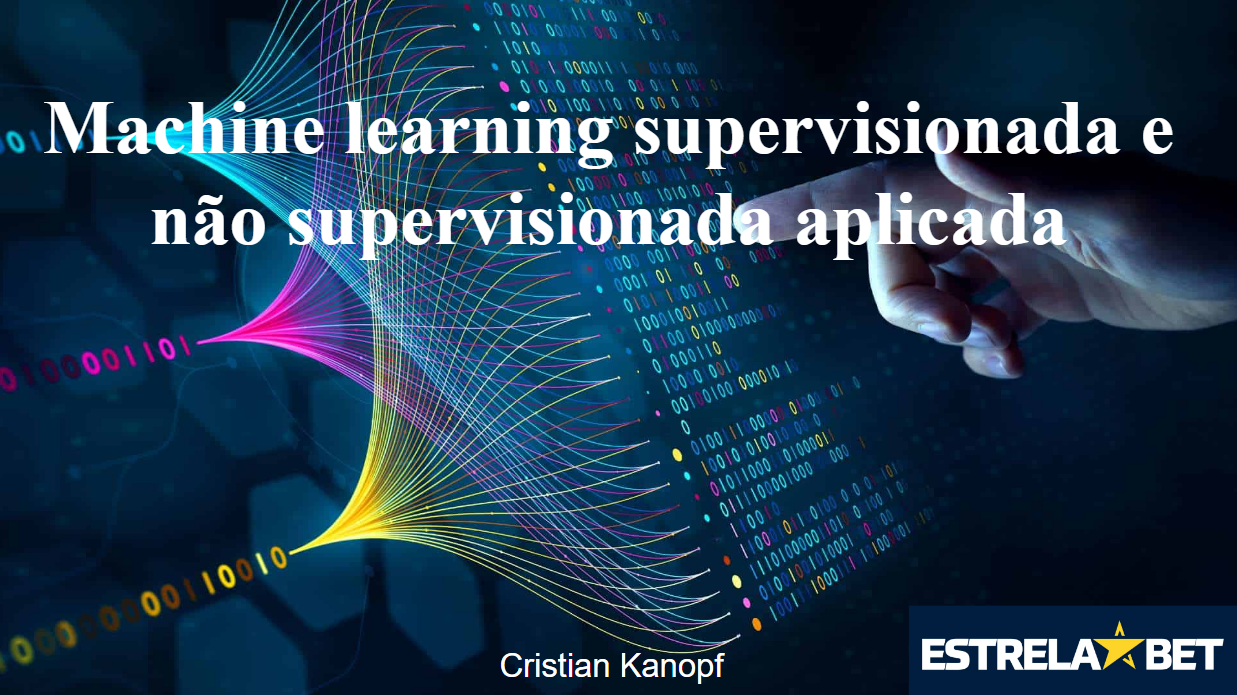

obj_ID = Identificador de Objeto, o valor único que identifica o objeto no catálogo de imagens usado pelo CAS (Sistema de Análise de Imagens)

alpha = Ângulo de Ascensão Reta (no época J2000)

delta = Ângulo de Declinação (no época J2000)

u = Filtro Ultravioleta no sistema fotométrico

g = Filtro Verde no sistema fotométrico

r = Filtro Vermelho no sistema fotométrico

i = Filtro Infravermelho Próximo no sistema fotométrico

z = Filtro Infravermelho no sistema fotométrico

run_ID = Número da Execução usado para identificar a varredura específica

rereun_ID = Número de Retorno para especificar como a imagem foi processada

cam_col = Coluna da Câmera para identificar a linha de varredura dentro da execução

field_ID = Número de Campo para identificar cada campo

spec_obj_ID = ID Único usado para objetos espectroscópicos ópticos (isso significa que duas observações diferentes com o mesmo spec_obj_ID devem compartilhar a mesma classe de saída)

classe = classe do objeto (galáxia, estrela ou objeto quasar)

redshift = valor de desvio para o vermelho com base no aumento no comprimento de onda

plate = ID da placa, identifica cada placa no SDSS

MJD = Data Julian Modificada, usada para indicar quando um determinado conjunto de dados do SDSS foi coletado

fiber_ID = ID da fibra que apontou a luz no plano focal em cada observação

A expressão "no época J2000" refere-se ao sistema de coordenadas celestes baseado na posição das estrelas e outros objetos astronômicos na época do ano 2000, especificamente no equinócio de primavera de 2000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#pca explicação

In [ ]:
imported_dataset = pd.read_csv('/content/star_classification.csv', delimiter = ',', error_bad_lines=False)
imported_dataset = imported_dataset.dropna()

In [ ]:
imported_dataset

In [ ]:
unique_values = imported_dataset['class'].unique()
unique_values

In [ ]:
value_counts = imported_dataset['class'].value_counts()
value_counts

In [ ]:
df = pd.DataFrame(imported_dataset)

desired_samples = 18961

balanced_df = pd.DataFrame()

unique_classes = df['class'].unique()


for class_label in unique_classes:
    class_data = df[df['class'] == class_label]
    sampled_data = class_data.sample(n=desired_samples, random_state=42)
    balanced_df = pd.concat([balanced_df, sampled_data])


In [ ]:
total_nan = balanced_df['class'].isna().sum()

In [ ]:
total_nan

In [ ]:
value_counts = balanced_df['class'].value_counts()
value_counts

In [ ]:
star_dataset = balanced_df.drop(columns=['class'])

In [ ]:
star_dataset

In [ ]:
data = star_dataset[['alpha','delta','u','g','r','i','z']]

In [ ]:
data

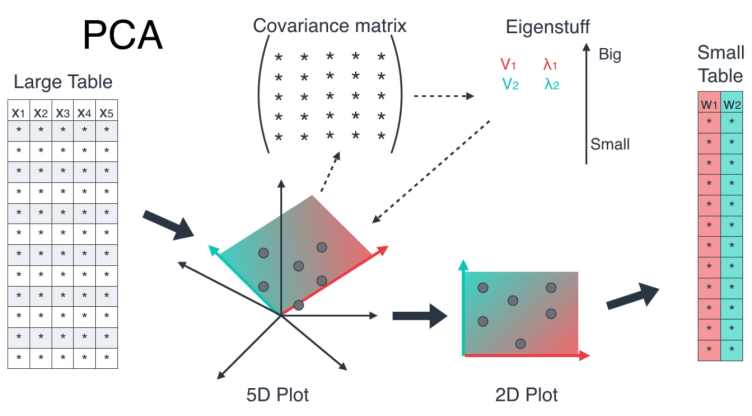

In [ ]:
data = data

X = data.iloc[:, 1:].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(X_scaled)

labels = kmeans.labels_

data['Cluster'] = labels

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering com K-Means após PCA')
plt.show()

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering com K-Means após PCA')

plt.xlim(-1, 1)  # Substitua x_min e x_max pelos valores desejados
plt.ylim(-10, 10)  # Substitua y_min e y_max pelos valores desejados
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np


In [ ]:
dataset = balanced_df[['alpha','delta','u','g','r','i','z']]

X = dataset
y = balanced_df['class']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()


y_treino_transformed = le.fit_transform(y_treino)
y_teste_transformed = le.fit_transform(y_teste)

y_treino_categorized = to_categorical(y_treino_transformed, num_classes=3)
y_teste_categorized = to_categorical(y_teste_transformed, num_classes=3)


categoria_para_classe = {i: classe for i, classe in enumerate(le.classes_)}

In [ ]:
categoria_para_classe

In [ ]:
y_teste_categorized

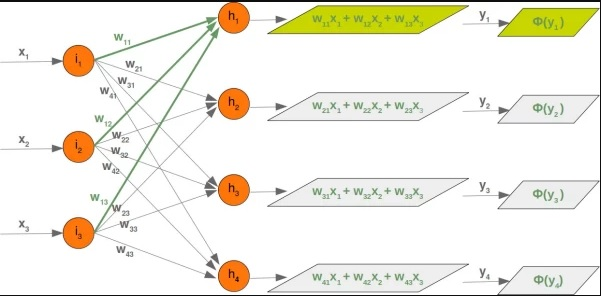

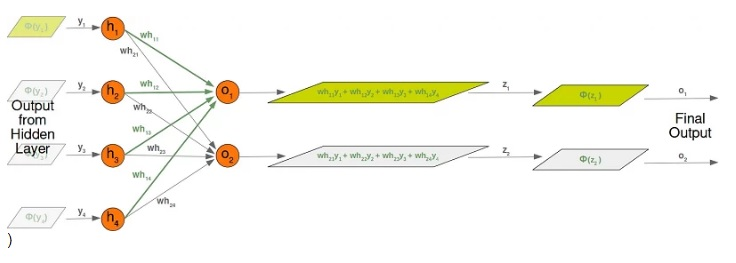

https://python-course.eu/machine-learning/neural-networks-structure-weights-and-matrices.php

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_treino.shape[1], activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer="adam", loss='categorical_crossentropy')


history = model.fit(X_treino, y_treino_categorized, epochs=10, verbose = 1)


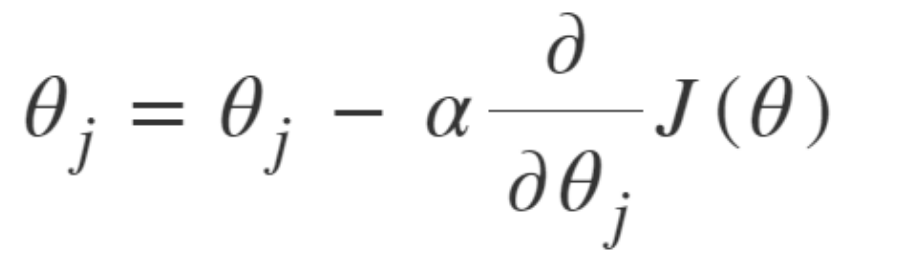

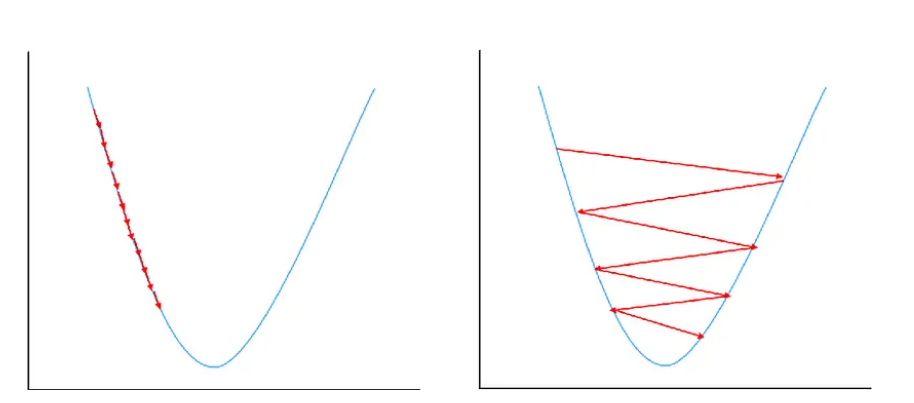

https://medium.com/@cristiankanopf/a-import%C3%A2ncia-do-learning-rate-na-rede-neural-um-exemplo-pr%C3%A1tico-e-matem%C3%A1tico-d3a60a743adf

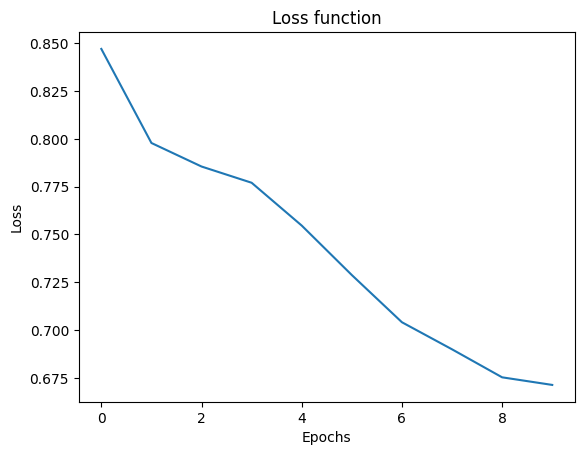

In [ ]:
# Plot the loss function
plt.plot(history.history['loss'])
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
predictions_in_test = []
for index, row in X_teste.head(10).iterrows():
    #print(row)
    sample = row.values
    sample = sample.reshape(1, -1)
    prediction = model.predict(sample)
    predictions_in_test.append(prediction[0])

In [ ]:
predictions_in_test

In [ ]:
categoria_para_classe

In [ ]:
y_teste

In [ ]:
def labelize(predictions):
  classes = []
  for prob in predictions:
      classe = np.argmax(prob)
      if classe == 0:
          classes.append('GALAXY')
      if classe == 1:
          classes.append('QSO')
      if classe == 2:
          classes.append('STAR')

  df = pd.DataFrame({'CLASSE': classes})
  return(df)


In [ ]:
output_predictions_labelized = labelize(predictions_in_test)
output_predictions_labelized

In [ ]:
y_teste.head(200)

In [ ]:
import time

inicio = time.time()

predictions_in_test = []
for index, row in X_teste.head(200).iterrows():

    sample = row.values
    sample = sample.reshape(1, -1)
    prediction = model.predict(sample)
    predictions_in_test.append(prediction[0])


fim = time.time()


tempo_decorrido = fim - inicio


print(f"Tempo de execução: {tempo_decorrido:.2f} segundos")

In [ ]:


df_classes = pd.DataFrame({'Class': y_teste.head(200)})

In [ ]:
df_classes

In [ ]:
predictions_in_test = labelize(predictions_in_test)
output_for_explore = pd.DataFrame(predictions_in_test)

In [ ]:
output_for_explore

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame()

df_classes.reset_index(drop=True, inplace=True)
output_for_explore.reset_index(drop=True, inplace=True)

# Compare as duas colunas de strings e crie uma nova coluna 'igual'
df['igual'] = np.where(df_classes['Class'] == output_for_explore['CLASSE'], 1, 0)

In [ ]:
df['igual']

In [ ]:
soma_1 = (df['igual'] == 1).sum()

# Calcule a soma dos valores iguais a 0
soma_0 = (df['igual'] == 0).sum()

# Imprima os resultados
print(f"Soma dos valores True: {soma_1}")
print(f"Soma dos valores False: {soma_0}")

Soma dos valores True: 130
Soma dos valores False: 70


In [ ]:
aprox_precision = (soma_1/200)*100
print('A precisão aproximada para os 200 primeiros valores do conjunto de validação é de {}%'. format(aprox_precision))

A precisão aproximada para os 200 primeiros valores do conjunto de validação é de 65.0%


In [ ]:
73.5% para 20 epocas


In [ ]:
#parametros da rede
#citar os dois problemas bem definidos
#fazer slides

SyntaxError: ignored